In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

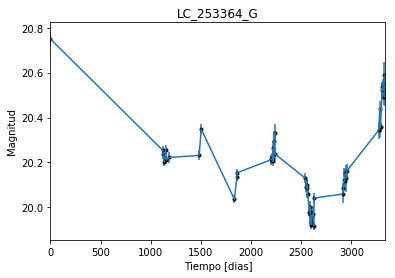

In [2]:
data = np.genfromtxt('LC_253364_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_253364_G')
plt.savefig("LC_253364_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

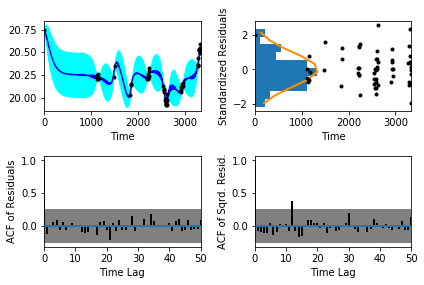

In [5]:
sample.assess_fit()

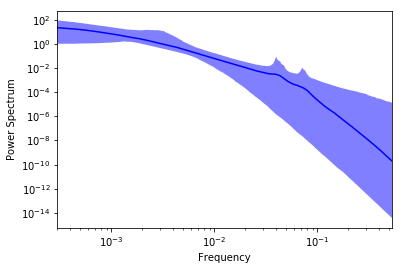

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

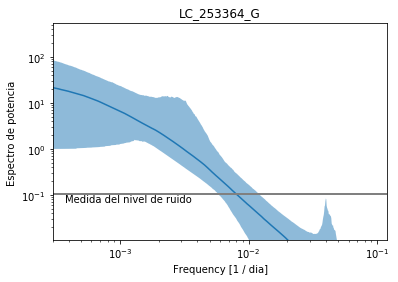

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_253364_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_253364_G')

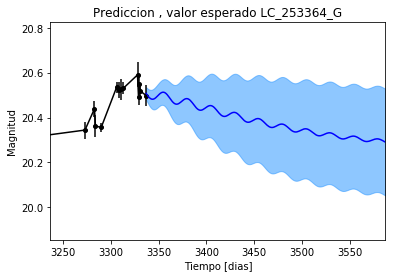

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_253364_G')

Text(0.5,1,'Prediccion, Caminos simulados_LC_253364_G')

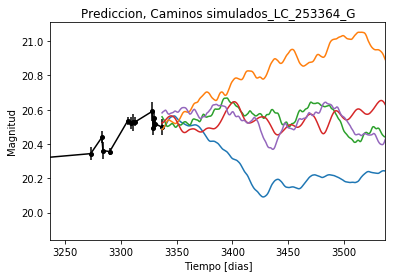

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_253364_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


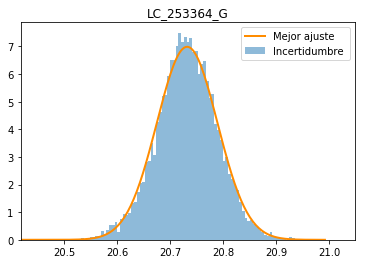

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_253364_G')
plt.savefig("Mejor_ajuste_LC_253364_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_253364_G')

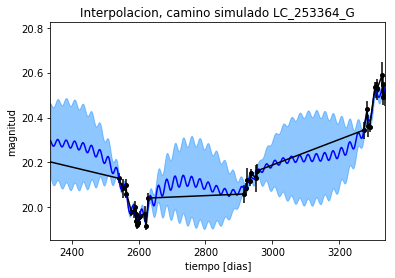

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_253364_G')

Text(0.5,1,'Interpolacion, camino simulado LC_253364_G')

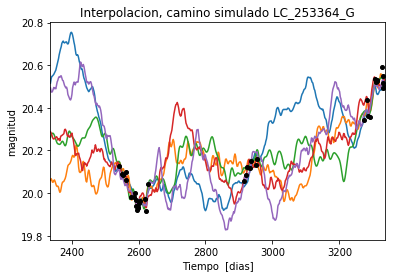

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_253364_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 312.134403541
Median: 0.0112386297217
Standard deviation: 0.188321250129
68% credibility interval: [ 0.00084051  0.17150132]
95% credibility interval: [  3.50605020e-04   7.54283272e-01]
99% credibility interval: [  3.12222440e-04   9.83502930e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 249.525224895
Median: 0.00472878356601
Standard deviation: 0.10125325979
68% credibility interval: [ 0.00060803  0.06027164]
95% credibility interval: [  3.33542814e-04   3.41561922e-01]
99% credibility interval: [  3.06151118e-04   7.09483216e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 1524.4140995
Median: 0.0327854703954
St

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 238.550631043
Median: 112.524767771
Standard deviation: 2.27718709127
68% credibility interval: [ 110.04260303  114.37422264]
95% credibility interval: [ 107.17448392  116.14112936]
99% credibility interval: [ 105.16151832  116.93687093]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 509.525933708
Median: 0.540812739668
Standard deviation: 2.46086994688
68% credibility interval: [ 0.05205488  4.25982326]
95% credibility interval: [ 0.01588267  8.32467363]
99% credibility interval: [  0.01171822  11.34097492]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 219.226658768
Median: 0.589198715027
Standard deviation: 10.7083033978
68% credibility interval: [  0.06938908  11.17796733]
95% credibility interval: [  6.2357795

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1538.85984815
Median: 5.51970208997e-40
Standard deviation: 5.3831561544e+23
68% credibility interval: [  2.87637582e-80   5.95147451e-10]
95% credibility interval: [  1.18166224e-107   5.48541374e+007]
99% credibility interval: [  3.58574464e-125   1.05876183e+023]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 827.626549592
Median: 20.3043688493
Standard deviation: 0.113085977397
68% credibility interval: [ 20.20935597  20.41695992]
95% credibility interval: [ 20.10485043  20.5391616 ]
99% credibility interval: [ 20.01069055  20.66773321]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 193.198886915
Median: 0.0498946472851
Standard deviation: 0.252791239243
68% credibility interval: [ 0.          0.37512919]
95% credibility interval: [ 0.          0.94564553]
99% credibility interval: [ 0.        1.038838]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 193.198886915
Median: 0.0498946472851
Standard deviation: 0.252791239243
68% credibility interval: [ 0.          0.37512919]
95% credibility interval: [ 0.          0.94564553]
99% credibility interval: [ 0.        1.038838]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 379.56157419
Median: 0.0
Standard deviation: 0.000943647060303
68% credibility

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 238.550631043
Median: 112.524767771
Standard deviation: 2.27718709127
68% credibility interval: [ 110.04260303  114.37422264]
95% credibility interval: [ 107.17448392  116.14112936]
99% credibility interval: [ 105.16151832  116.93687093]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1383.00933135
Median: 0.0536895314328
Standard deviation: 0.0428303677676
68% credibility interval: [ 0.03585653  0.0883311 ]
95% credibility interval: [ 0.02410439  0.16525899]
99% credibility interval: [ 0.01965298  0.26758276]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 895.591573137
Median: 1.00638346992
Standard deviation: 0.198704345471
68% credibility interval: [ 0.84109234  1.22270399]
95% credibility interval: [ 0.71159303  1.4876965 ]
99% credibility interval: [ 0.64624539  1.6719793 ]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 246.14810097
Median: 0.000894745883303
Standard deviation: 0.188043612838
68% credibility interval: [  5.04916737e-05   5.36334575e-02]
95% credibility interval: [  1.97416069e-10   5.51592880e-01]
99% credibility interval: [  4.00878993e-27   1.34637997e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 312.134403541
Median: (-0.0706143931399-2.97204924612j)
Standard deviation: 1.9806320702
68% credibility interval: [-1.07757456+0.j         -0.00528107-0.44967593j]
95% credibility interval: [ -4.73930157e+00-0.02911453j  -2.20291631e-03-0.25048743j]
99% credibility interval: [ -6.17953116e+00+0.j          -1.96175145e-03-0.24792418j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 249.525224895
Median: (-0.0297118234228+3.78352400064j)
Standard deviation: 1.71100761465
68% credibility interval: [-0.37869786+0.08289346j -0.00382039+0.26580652j]
95% credibility interval: [ -2.14609685e+00+3.26760168j  -2.09571131e-03+0.43733513j]
99% credibility interval: [ -4.45781452e+00+5.1393105j  -1.92360421e-03+0.j       ]
Posteri